In [1]:
%matplotlib inline

# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

os.chdir('..')

from db_manager import DBManager

plt.style.use('seaborn')

In [3]:
# Save current dir in case it can be useful
project_dir = os.getcwd()

In [22]:
# Get data
authors = pd.read_csv(project_dir + '/data/authors.csv')
papers = pd.read_csv(project_dir + '/data/papers.csv')
papers_authors = pd.read_csv(project_dir + '/data/papers_authors.csv')

# Papers

In [23]:
print("Total papers: " + str(papers.shape[0]))

Total papers: 38351


In [24]:
papers.head()

,id,title,DOI,year,source,citations,edamCategory,link,authors
0,1,A peptide-based method for 13C Metabolic Flux ...,10.1371/journal.pcbi.1003827,2014,plos computational biology,7,Omics > Genomics > Transcriptomics,https://journals.plos.org/ploscompbiol/article...,8.0
1,2,Baseline CD4+ T cell counts correlates with HI...,10.1371/journal.pcbi.1003830,2014,plos computational biology,0,Computational Biology > Phylogeny,https://journals.plos.org/ploscompbiol/article...,10.0
2,3,Evolution of the F0F1 ATP Synthase Complex in ...,10.1371/journal.pcbi.1003821,2014,plos computational biology,8,Computational Biology > Structure analysis,https://journals.plos.org/ploscompbiol/article...,2.0
3,4,Dynamic Modelling of Pathways to Cellular Sene...,10.1371/journal.pcbi.1003728,2014,plos computational biology,12,Computational Biology > Phylogeny,https://journals.plos.org/ploscompbiol/article...,7.0
4,5,Unbiased Functional Clustering of Gene Variant...,10.1371/journal.pcbi.1003815,2014,plos computational biology,7,Omics > Genomics > Functional genomics,https://journals.plos.org/ploscompbiol/article...,3.0


### Papers without authors

In [37]:
papers_without_authors = papers[papers['authors']==0]
print("Papers without authors " + str(papers_without_authors.shape[0]))
#papers_without_authors.head()

Papers without authors 16


In [38]:
papers = papers[papers['authors']!=0]
print("Papers with authors " + str(papers.shape[0]))

Papers with authors 38335


## Evolution of papers by year

In [43]:
papers_by_year = papers.groupby('year').size()

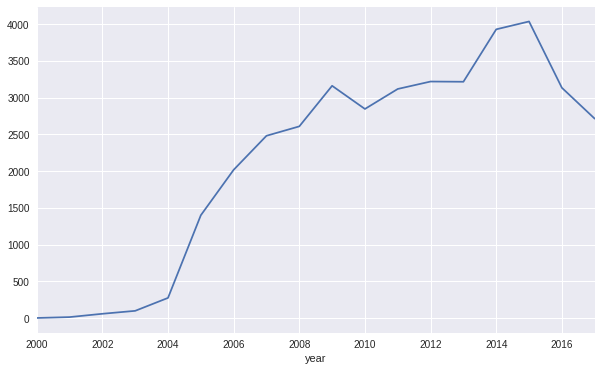

In [53]:
plt.figure(figsize=(10,6))
papers_by_year.plot()

## Evolution of average citations by year

In [78]:
papers['citations'].describe()

count    38335.000000
mean        34.062658
std        154.072131
min          0.000000
25%          5.000000
50%         13.000000
75%         31.000000
max      14513.000000
Name: citations, dtype: float64

In [69]:
avg_citations_by_year = papers.groupby('year').mean()['citations']

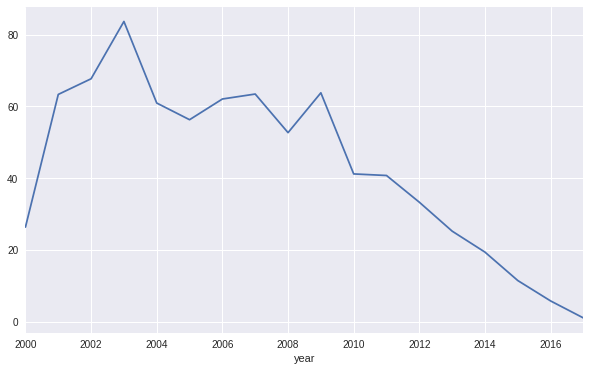

In [68]:
plt.figure(figsize=(10,6))
avg_citations_by_year.plot()

## Evolution of average authors by year

In [77]:
papers['authors'].describe()

count    38329.000000
mean         5.562603
std          3.961211
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max        138.000000
Name: authors, dtype: float64

In [71]:
avg_authors_by_year = papers.groupby('year').mean()['authors']

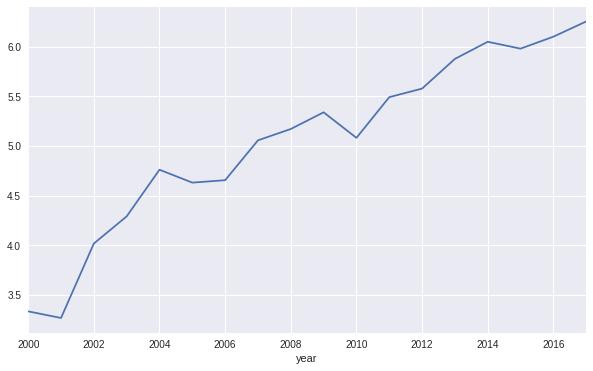

In [72]:
plt.figure(figsize=(10,6))
avg_authors_by_year.plot()

## Categories

In [102]:
row_categories = papers['edamCategory']
categories = []
for row_category in row_categories:
    for category in row_category.split('>'):
        clean_category = category.strip()
        exists_category_dict = False
        for category_dict in categories:
            if category_dict['category_name'] == clean_category:
                category_dict['count'] += 1
                exists_category_dict = True
                break
        if not exists_category_dict:
            categories.append(
                {
                    'category_name': clean_category,
                    'count': 1
                }
            )

In [114]:
categories_df = pd.DataFrame(categories)
total_categories = categories_df.shape[0]
print("There are " + str(total_categories) + " categories")
categories_df.sort_values('count', inplace=True, ascending=False)
categories_df.head()

There are 18 categories


,category_name,count
3,Computational Biology,24273
0,Omics,12567
1,Genomics,12567
7,Nucleic acids,6663
6,Functional genomics,5293


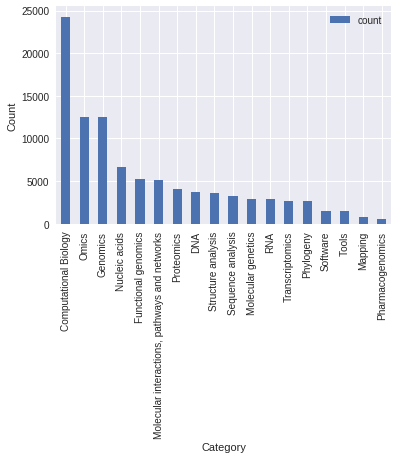

In [120]:
categories_df.plot.bar(x='category_name', y='count')
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

## Source

In [90]:
papers_by_source = papers.groupby('source').size().sort_values(ascending=False)

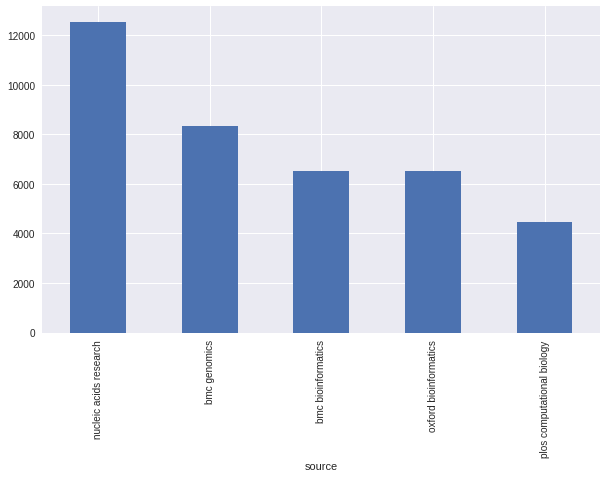

In [91]:
plt.figure(figsize=(10,6))
papers_by_source.plot(kind='bar')

# Authors

In [70]:
print("Total authors: " + str(authors.shape[0]))

Total authors: 122963


In [121]:
authors.head()

,id,name,gender,papers,total_citations,papers_as_first_author,papers_with_citations,h-index
0,1,Amit Ghosh,male,3,21,1,3,2
1,2,Jerome Nilmeier,male,1,7,0,1,1
2,3,Paul D Adams,male,3,92,0,3,3
3,4,Jay D Keasling,male,10,214,0,10,7
4,5,Aindrila Mukhopadhyay,female,6,59,0,5,4


## Gender distribution 

In [140]:
authors_by_gender = authors.groupby('gender').size().sort_values(ascending=False)
per_authors_by_gender = authors_by_gender/authors.shape[0]
per_authors_by_gender

gender
male         0.548490
female       0.287225
unknown      0.164277
error_api    0.000008
dtype: float64

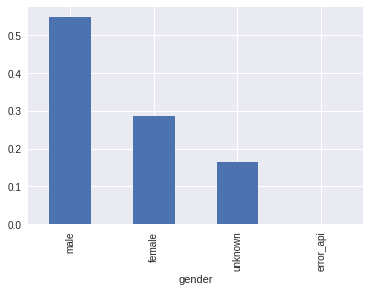

In [129]:
per_authors_by_gender.plot.bar()

## Papers

### Citations per paper

In [136]:
authors['total_citations'].describe()

count    122963.000000
mean         69.357839
std         311.810533
min           0.000000
25%           6.000000
50%          19.000000
75%          49.000000
max       24962.000000
Name: total_citations, dtype: float64

### Top-10 Most cited author

In [149]:
authors.sort_values('total_citations', inplace=True, ascending=False)
authors[['name','gender','total_citations']].head(10)

,name,gender,total_citations
7414,Richard Durbin,male,24962
26068,Heng Li,unknown,22523
96294,R Lopez,unknown,15715
87351,F Valentin,unknown,14613
115136,T J Gibson,unknown,14539
118421,J D Thompson,unknown,14518
118416,R Chenna,unknown,14513
118415,N P Brown,unknown,14513
118422,D G Higgins,unknown,14513
118420,A Wilm,unknown,14513


### Papers per author

In [138]:
authors['papers'].describe()

count    122963.000000
mean          1.732098
std           2.065762
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          69.000000
Name: papers, dtype: float64

### Top-10 Most productive author

In [150]:
authors.sort_values('papers', inplace=True, ascending=False)
authors[['name','gender','papers']].head(10)

,name,gender,papers
8093,Peter F Stadler,male,69
3250,Janusz M Bujnicki,male,68
1943,Wei Wang,unknown,62
3241,Peer Bork,male,53
4104,Alfonso Valencia,male,51
265,Philip E Bourne,male,48
1941,Jun Wang,male,48
23361,Wei Li,unknown,47
10014,Jing Wang,unknown,46
3420,Mark Gerstein,male,46


### H-Index

In [143]:
authors['h-index'].describe()

count    122963.000000
mean          1.483625
std           1.450438
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: h-index, dtype: float64

### Top-10 Most impactful author

In [155]:
authors.sort_values('h-index', inplace=True, ascending=False)
authors[['name','gender','papers','total_citations','h-index']].head(10)

,name,gender,papers,total_citations,h-index
3241,Peer Bork,male,53,12624,32
8093,Peter F Stadler,male,69,3420,30
3420,Mark Gerstein,male,46,2202,25
26310,Minoru Kanehisa,male,31,10150,25
8765,Ewan Birney,male,32,7033,25
4047,David S Wishart,male,37,9711,25
265,Philip E Bourne,male,48,3171,25
122946,William Stafford Noble,male,40,4243,24
3250,Janusz M Bujnicki,male,68,2186,23
18169,Hsien-Da Huang,male,35,2813,23


### First author

In [156]:
authors['papers_as_first_author'].describe()

count    122963.000000
mean          0.310866
std           0.656986
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.000000
Name: papers_as_first_author, dtype: float64

### Top-10 authors that appeared as first author

In [157]:
authors.sort_values('papers_as_first_author', inplace=True, ascending=False)
authors[['name','gender','papers','papers_as_first_author']].head(10)

,name,gender,papers,papers_as_first_author
26068,Heng Li,unknown,19,14
8781,Kai Wang,male,32,13
18741,Shuangge Ma,female,17,12
18398,Yi Wang,unknown,22,12
16474,Bin Liu,unknown,21,11
10929,Robert Hoehndorf,male,16,11
1943,Wei Wang,unknown,62,11
15446,Junbai Wang,unknown,12,11
3123,Yan Zhang,male,45,10
5690,Zhiming Dai,unknown,13,10
